In [1]:
from sklearn.model_selection import train_test_split

In [2]:
!pip install watermark

In [3]:
%load_ext watermark
%watermark -u -d -p numpy, pandas, matplotlib, sklearn

UsageError: unrecognized arguments: pandas, matplotlib, sklearn


In [5]:
from sklearn import datasets
import numpy as np

In [6]:
iris = datasets.load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
x = iris.data[:, [2,3]]

In [13]:
y = iris.target

In [14]:
np.unique(y)

array([0, 1, 2])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=777, \
                                                    test_size = 0.3, stratify=y)

In [18]:
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [23]:
#  데이터 표준화 : (x-x.mean)/x.std

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [68]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=1000, eta0 = 0.01, tol=1e-5, )
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=1e-05,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
y_pred = ppn.predict(x_test_std)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2])

In [70]:
y_test

array([0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2])

In [71]:
np.mean(y_pred==y_test)

0.9333333333333333

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [50]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], 
                    y=x[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]

        plt.scatter(x_test[:, 0],
                    x_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

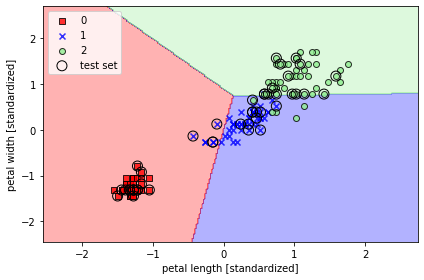

In [51]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(x=x_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [52]:
### LogisticRegression

[-7.00000000e+00 -6.90000000e+00 -6.80000000e+00 -6.70000000e+00
 -6.60000000e+00 -6.50000000e+00 -6.40000000e+00 -6.30000000e+00
 -6.20000000e+00 -6.10000000e+00 -6.00000000e+00 -5.90000000e+00
 -5.80000000e+00 -5.70000000e+00 -5.60000000e+00 -5.50000000e+00
 -5.40000000e+00 -5.30000000e+00 -5.20000000e+00 -5.10000000e+00
 -5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000

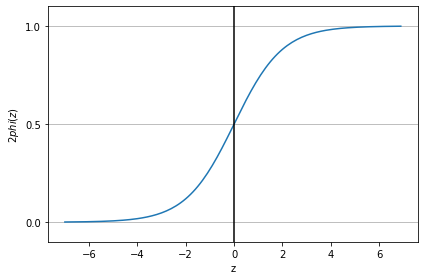

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
print(z)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$2phi (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

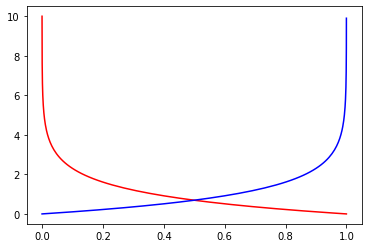

In [79]:
# y = 1
def cost_1(z):
    return -np.log(sigmoid(z))

# y = -1
def cost_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, c='red')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, c='blue')

In [83]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

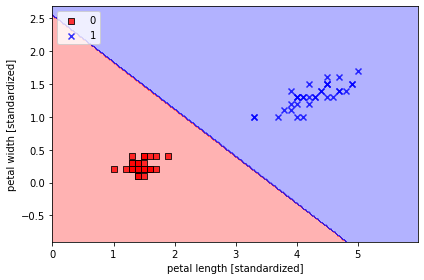

In [85]:
x_train = x_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train,
         y_train)

plot_decision_regions(x=X_train, 
                      y=y_train,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [92]:
### sklearn _ LogisticRegression - binary classification

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression(solver='liblinear', \
                        multi_class='auto', C=100, random_state=1)

In [95]:
x_train = x_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

In [96]:
lr.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

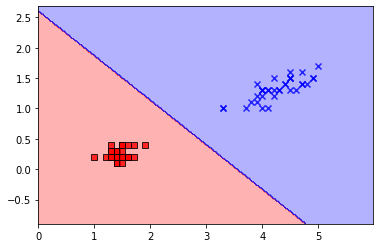

In [91]:
plot_decision_regions(x=x_train, y = y_train, classifier=lr)

In [ ]:
# multi_classification

In [6]:
iris = datasets.load_iris()

In [101]:
x = iris.data

In [102]:
y = iris.target

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=777, \
                                                    test_size = 0.3, stratify=y)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr = LogisticRegression(solver='liblinear', \
                        multi_class='auto', C=100, random_state=1)

In [105]:
lr.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
predictions = lr.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_test, predictions)

0.9555555555555556

In [116]:
lr.predict_proba(x_test)

array([[7.86705924e-01, 2.13294076e-01, 7.81406593e-16],
       [1.50250472e-04, 9.86964519e-01, 1.28852308e-02],
       [8.34605144e-01, 1.65394856e-01, 2.85232441e-16],
       [8.67219147e-04, 9.98489825e-01, 6.42955583e-04],
       [5.72806612e-02, 9.42716585e-01, 2.75335280e-06],
       [4.63119604e-06, 3.47868296e-01, 6.52127073e-01],
       [2.23820113e-02, 9.77549292e-01, 6.86971063e-05],
       [6.89877602e-09, 3.50362715e-01, 6.49637278e-01],
       [1.20508424e-06, 3.40324709e-01, 6.59674086e-01],
       [9.80520752e-01, 1.94792482e-02, 2.38559244e-21],
       [5.03750586e-07, 4.64651526e-02, 9.53534344e-01],
       [2.96706892e-06, 2.41363503e-01, 7.58633529e-01],
       [9.34747138e-04, 9.94507132e-01, 4.55812049e-03],
       [2.54021714e-08, 4.18454886e-01, 5.81545089e-01],
       [8.79861193e-01, 1.20138807e-01, 1.83422703e-17],
       [2.38355802e-04, 9.74170164e-01, 2.55914806e-02],
       [1.64638874e-04, 6.64016213e-01, 3.35819148e-01],
       [3.69780617e-07, 9.88895

In [118]:
lr.predict_proba(x_test).argmax(axis=1)

array([0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       2], dtype=int64)

In [120]:
lr.coef_

array([[ 0.95682799,  2.82032555, -4.61963171, -1.98971008],
       [-0.12569034, -2.59628039,  1.36035295, -2.97879062],
       [-5.76642358, -3.9657685 ,  8.7981435 ,  9.032769  ]])

In [119]:
## 규제를 통한 과적합 피하기...

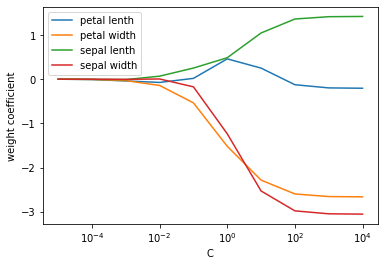

In [126]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', \
                            C =10.**c, random_state=1)
    lr.fit(x_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:,0],
        label='petal lenth')
plt.plot(params, weights[:,1],
        label='petal width')
plt.plot(params, weights[:,2],
        label='sepal lenth')
plt.plot(params, weights[:,3],
        label='sepal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()